### Target: 지점별 보드게임 이름 리스트

다음 사이트에 Selenium을 이용해서 로그인을 진행해봅시다 : https://redbutton.co.kr/

## 0. **필요 라이브러리 호출**

In [16]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [18]:
# 스크래핑에 필요한 라이브러리를 불러와봅시다.

from selenium import webdriver
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.webdriver import Keys, ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import time

## 1. **"STORE" 버튼 클릭**
- STORE 버튼에 해당하는 CLASS_NAME을 찾고,
- 동일한 CLASS_NAME을 갖는 버튼 목록을 확인한 후,
- STORE 버튼을 찾아 클릭

In [8]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://redbutton.co.kr/")
time.sleep(0.5)


# 홈페이지에 "STORE" 버튼을 찾아 클릭
not_today = driver.find_element(By.CLASS_NAME, "jt_popup_notoday")   # 팝업창 닫기
stores = driver.find_elements(By.CLASS_NAME, "elementor-item")       # 버튼 찾기
ActionChains(driver).click(not_today).perform()

# 버튼 목록 출력
for i, store in enumerate(stores):
    if store.text != "":
        print(f"{i}: {store.text}")

# 3번이 STORE 버튼
ActionChains(driver).click(stores[3]).perform()
time.sleep(0.5)

0: BRAND
1: BOARDGAME
2: MENU
3: STORE
4: CONTACT
23: 스낵/푸드
24: 세트메뉴
28: 매장찾기
30: 공지사항
31: 제휴/제안
32: 자주묻는 질문
33: 고객의견


## **2. 버튼 개수 및 목록 확인(전체 매장 개수와 비교)**

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://redbutton.co.kr/")
time.sleep(0.5)


# 홈페이지에 "STORE" 버튼을 찾아 클릭
not_today = driver.find_element(By.CLASS_NAME, "jt_popup_notoday")   # 팝업창 닫기
stores = driver.find_elements(By.CLASS_NAME, "elementor-item")       # 버튼 찾기
ActionChains(driver).click(not_today).perform()
ActionChains(driver).click(stores[3]).perform()

# "매장 보유게임 검색" 버튼 탐색
driver.implicitly_wait(10)
games_by_store = driver.find_elements(By.CLASS_NAME, "get_game_list_by_store")
time.sleep(0.5)

# 버튼 목록 출력(지점)
total = len(games_by_store)
print(f"총 버튼 수: {total}\n")

print("🔹 처음 3개:")
for i, el in enumerate(games_by_store[:3]):
    # 버튼 기준으로 title(td) 찾기
    title = el.find_element(By.XPATH, "../../td[@class='title']")
    print(f"{i}: {el.text} ({title.text})")

print("\n🔹 마지막 3개:")
for i, el in enumerate(games_by_store[-3:], start=total-3):
    title = el.find_element(By.XPATH, "../../td[@class='title']")
    print(f"{i}: {el.text} ({title.text})")

총 버튼 수: 103

🔹 처음 3개:
0: 매장 보유게임 검색 (강남2호점)
1: 매장 보유게임 검색 (강남논현점)
2: 매장 보유게임 검색 (강남점)

🔹 마지막 3개:
100: 매장 보유게임 검색 (한양대점)
101: 매장 보유게임 검색 (홍대점)
102: 매장 보유게임 검색 (화정점)


In [112]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://redbutton.co.kr/")
time.sleep(0.5)


# 홈페이지에 "STORE" 버튼을 찾아 클릭
not_today = driver.find_element(By.CLASS_NAME, "jt_popup_notoday")   # 팝업창 닫기
stores = driver.find_elements(By.CLASS_NAME, "elementor-item")       # 버튼 찾기
ActionChains(driver).click(not_today).perform()
ActionChains(driver).click(stores[3]).perform()

# "매장 보유게임 검색" 버튼 탐색
driver.implicitly_wait(10)
games_by_store = driver.find_elements(By.CLASS_NAME, "get_game_list_by_store")
time.sleep(0.5)

# # 버튼 목록 출력
# total = len(games_by_store)
# print(f"총 버튼 수: {total}\n")

for el in games_by_store:
    branch_id = el.get_attribute("data-branch-id")
    title = el.find_element(By.XPATH, "../../td[@class='title']").text
    print(f"{branch_id}: {title}")

43: 강남2호점
92: 강남논현점
22: 강남점
77: 거제고현점
53: 경남대점
14: 경성대점
90: 계명대점
75: 광명하안점
82: 광안리점
39: 광장코아점
72: 광주상무점
66: 광주수완점
94: 광주진월점
69: 광주첨단점
19: 광주충장로점
55: 구리돌다리점
9: 구월점
56: 김포구래점
23: 남포점
25: 노원점
88: 다산신도시점
17: 대전은행점
21: 대학로점
13: 동성로1호점
24: 동성로2호점
46: 동탄북광장점
84: 둔산점
103: 둔촌역점
54: 마곡발산점
97: 망원역점
100: 목포평화광장점
61: 미금역점
81: 방이점
4: 범계점
73: 부산대점
67: 부산덕천점
101: 부산동래점
78: 부산사상점
60: 부산아트몰링하단점
52: 부천시청점
6: 부천점
7: 부평점
27: 부평테마의거리점
12: 산본점
10: 서면1호점
26: 서면2호점
59: 서울대입구역점
2: 서현점
68: 성수점
62: 성신여대점
44: 수원인계점
5: 수원점
79: 수원행궁점
45: 수유역점
57: 수지구청역점
89: 순천호수공원점
80: 시네마강남점
93: 시흥정왕점
16: 신림점
15: 신촌점
28: 아주대점
86: 안산고잔점
3: 안산점
11: 안양점
96: 압구정로데오점
48: 여수학동점
32: 연신내점
83: 영등포점
8: 영통점
99: 오목교점
63: 오산시청점
36: 용인동백점
51: 용인보정점
85: 용인역북점
20: 울산삼산점
42: 울산성남점
87: 울산일산지점
35: 웨스턴돔점
64: 의정부민락점
47: 이수역점
74: 인천검단신도시점
65: 인천논현점
98: 인천청라점
30: 잠실새내점
41: 전남대점
34: 전북대점
38: 제주시청점
70: 종로점
31: 창원상남점
1: 천안점
102: 천호로데오점
37: 철산점
50: 청주성안길점
40: 청주터미널점
49: 충남대점
76: 파주야당점
95: 평내호평점
71: 평택소사벌점
33: 평택역점
91: 하남미사점
58: 한양대점
29: 홍대점
18: 화정점


- 레드버튼 매장은 총 103개로, 버튼 총 개수와 일치함

## **3. 지점별 게임 목록 사이트 접속 및 게임 이름 식별**

In [14]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://redbutton.co.kr/")
time.sleep(0.5)


# 홈페이지에 "STORE" 버튼을 찾아 클릭
not_today = driver.find_element(By.CLASS_NAME, "jt_popup_notoday")   # 팝업창 닫기
stores = driver.find_elements(By.CLASS_NAME, "elementor-item")       # 버튼 찾기
ActionChains(driver).click(not_today).perform()
ActionChains(driver).click(stores[3]).perform()

# "매장 보유게임 검색" 버튼 탐색
driver.implicitly_wait(10)
games_by_store = driver.find_elements(By.CLASS_NAME, "get_game_list_by_store")

# 첫 번째 매장 선택
ActionChains(driver).click(games_by_store[0]).perform()
driver.implicitly_wait(10)

# "게임이름" input 요소에 찾고 "Enter"키 입력
keyword_input = driver.find_element(By.ID, "game-keyword")
ActionChains(driver).send_keys_to_element(keyword_input, Keys.ENTER).perform()
driver.implicitly_wait(200)

# 게임 이름 추출
game_titles = driver.find_elements(By.CLASS_NAME, "game-title")

# 게임 이름 출력
for i, title in enumerate(game_titles):
    print(f"{i}: {title.text}")

0: 세븐원더스 : 듀얼
1: 딕싯 : 메모리즈
2: 드렉사우
3: 도블
4: 데드오브윈터
5: 더게임
6: 달무티
7: 닥터유레카
8: 다빈치코드
9: 노땡스
10: 고스트
11: 뤄양의사람들
12: 루핑루이
13: 루미큐브
14: 로보77
15: 렉시오
16: 레지스탕스:쿠
17: 레지스탕스 아발론
18: 시퀀스
19: 러시아워쉬프트
20: 러시아워
21: 러브레터
22: 라온
23: 라스베가스
24: 라비린스
25: 미스터잭 포켓
26: 미니빌
27: 모던아트
28: 모노폴리
29: 나방속이기 (장난꾸러기 나방)
30: 맨해튼
31: 마헤
32: 서바이브
33: 마법의미로
34: 마라케시
35: 블리츠
36: 블로커스
37: 부루마불
38: 웰컴백 투더 던전
39: 뱅:닷지시티
40: 뱅:다이스
41: 텔레스트레이션
42: 뱅
43: 배틀쉽
44: 바퀴벌레포커
45: 바퀴벌레 샐러드
46: 스플렌더
47: 스파이폴
48: 스티키스틱스
49: 스트라테고
50: 스트라이크
51: 스크래블
52: 슈퍼라이노
53: 숲속의음악대
54: 쇼텐토텐
55: 셜록13
56: 세트
57: 선물입니다
58: 사보타지
59: 원카드클래식
60: 우노어택
61: 우노
62: 와이어트어프
63: 아임더보스
64: 아브라카왓
65: 아발론
66: 아그리콜라
67: 신의한수
68: 체스 앤 체커스
69: 챠오챠오
70: 줄로레또
71: 젬블로Q
72: 젬블로
73: 젠가
74: 젝스님트
75: 장미전쟁
76: 장기
77: 이매진
78: 코코너츠
79: 코드777
80: 티켓투라이드 : 유럽
81: 컴팩트컬링
82: 컬러레또
83: 카탄:5-6인확장
84: 카탄:항해사
85: 카탄:도시와기사
86: 카르카손
87: 치킨차차
88: 텀블링몽키
89: 터틀블럭
90: 타임라인:한국사
91: 타뷸라의늑대
92: 타르기
93: 클루
94: 클라스크
95: 퀵소
96: 쿼클
97: 쿼리도
98: 티켓투라이드 : 노르딕컨트리
99: 할리갈리
100: 한밤의 늑대인간 : 기본캐릭터
101: 포세

# 보드게임 찾기 페이지에서 Dropdown value로 모든 지점 보드게임 한 번에 크롤하기

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://redbutton.co.kr/")
time.sleep(0.5)


# 홈페이지에 "게임 검색하기" 버튼을 찾아 눌러봅시다.
not_today = driver.find_element(By.CLASS_NAME, "jt_popup_notoday")
buttons = driver.find_elements(By.CLASS_NAME, "elementor-button-text")
ActionChains(driver).click(not_today).perform()
ActionChains(driver).click(buttons[1]).perform()
time.sleep(0.5)

# 지점명 ➝ 보유 게임 리스트 딕셔너리
store_games = {}

# value=1부터 103까지 반복
for value in range(1, 104):
    try:
        # 페이지가 새로 로드 되면서 드롭다운 요소가 변경되어서 매번 받아오기
        dropdown = driver.find_element(By.ID, "game-store")
        select = Select(dropdown)

        # value를 문자열로 지정 후 선택
        select.select_by_value(str(value))
        time.sleep(1)

        # 선택된 지점명 가져오기
        selected_option = select.first_selected_option
        store_name = selected_option.text.strip()
        print(f"🔍 {store_name} 지점 처리 중...")

        # 검색창에 Enter 입력 (이전에 입력값이 남아 있지 않아서 그냥 Enter만)
        keyword_input = driver.find_element(By.ID, "game-keyword")
        ActionChains(driver).send_keys_to_element(keyword_input, Keys.ENTER).perform()
        time.sleep(1)

        # 게임 제목 추출
        game_titles = driver.find_elements(By.CLASS_NAME, "game-title")
        game_list = [g.text.strip() for g in game_titles if g.text.strip()]

        # 딕셔너리에 저장
        store_games[store_name] = game_list
        print(f"✅ {store_name} - {len(game_list)}개 게임 수집 완료")

    except Exception as e:
        print(f"❌ value={value} 처리 중 오류 발생: {e}")

# 수집 완료 후 일부 예시 출력
print("\n📦 수집 결과 예시:")
for store, games in list(store_games.items())[:3]:
    print(f"{store} ({len(games)}개): {games[:5]} ...")

🔍 천안 지점 처리 중...
✅ 천안 - 386개 게임 수집 완료
🔍 서현 지점 처리 중...
✅ 서현 - 559개 게임 수집 완료
🔍 안산 지점 처리 중...
✅ 안산 - 402개 게임 수집 완료
🔍 범계 지점 처리 중...
✅ 범계 - 394개 게임 수집 완료
🔍 수원 지점 처리 중...
✅ 수원 - 388개 게임 수집 완료
🔍 부천 지점 처리 중...
✅ 부천 - 396개 게임 수집 완료
🔍 부평 지점 처리 중...
✅ 부평 - 481개 게임 수집 완료
🔍 영통 지점 처리 중...
✅ 영통 - 413개 게임 수집 완료
🔍 구월 지점 처리 중...
✅ 구월 - 436개 게임 수집 완료
🔍 서면1호 지점 처리 중...
✅ 서면1호 - 353개 게임 수집 완료
🔍 안양 지점 처리 중...
✅ 안양 - 397개 게임 수집 완료
🔍 산본 지점 처리 중...
✅ 산본 - 372개 게임 수집 완료
🔍 동성로1호 지점 처리 중...
✅ 동성로1호 - 473개 게임 수집 완료
🔍 경성대 지점 처리 중...
✅ 경성대 - 363개 게임 수집 완료
🔍 신촌 지점 처리 중...
✅ 신촌 - 410개 게임 수집 완료
🔍 신림 지점 처리 중...
✅ 신림 - 381개 게임 수집 완료
🔍 대전은행 지점 처리 중...
✅ 대전은행 - 379개 게임 수집 완료
🔍 화정 지점 처리 중...
✅ 화정 - 323개 게임 수집 완료
🔍 충장로 지점 처리 중...
✅ 충장로 - 373개 게임 수집 완료
🔍 삼산 지점 처리 중...
✅ 삼산 - 416개 게임 수집 완료
🔍 대학로 지점 처리 중...
✅ 대학로 - 423개 게임 수집 완료
🔍 강남 지점 처리 중...
✅ 강남 - 399개 게임 수집 완료
🔍 남포 지점 처리 중...
✅ 남포 - 364개 게임 수집 완료
🔍 동성로2호 지점 처리 중...
✅ 동성로2호 - 414개 게임 수집 완료
🔍 노원 지점 처리 중...
✅ 노원 - 343개 게임 수집 완료
🔍 서면2호 지점 처리 중...
✅ 서면2호 - 373개 게임 수집 완료
🔍 부평테마의거

# 지역별 지점 데이터 크롤링하기 

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
import time

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://redbutton.co.kr/")
time.sleep(0.5)

# 팝업 닫고 "게임 검색하기" 버튼 클릭
not_today = driver.find_element(By.CLASS_NAME, "jt_popup_notoday")
buttons = driver.find_elements(By.CLASS_NAME, "elementor-button-text")
ActionChains(driver).click(not_today).perform()
ActionChains(driver).click(buttons[1]).perform()
time.sleep(0.5)

# 지역 -> [지점명 ➝ 보유 게임 리스트] 딕셔너리
location_store_games = {}

# 지역 드롭다운 요소 선택
dropdown_location = driver.find_element(By.ID, "game-location")
select_location = Select(dropdown_location)
locations_values = [opt.get_attribute("value") for opt in select_location.options if opt.get_attribute("value")]

# 각 지역마다 순회
for location_value in locations_values:
    try:
        # 매 루프마다 select 객체 재선언 (DOM 갱신 가능성 대비)
        dropdown_location = driver.find_element(By.ID, "game-location")
        select_location = Select(dropdown_location)
        select_location.select_by_value(location_value)
        time.sleep(1)

        # 현재 선택된 지역 이름 저장
        selected_location = select_location.first_selected_option
        location_name = selected_location.text.strip()
        print(f"🔍 {location_name} 지역 처리 중...")

        dropdown_store = driver.find_element(By.ID, "game-store")
        select_store = Select(dropdown_store)

        # 지역에 해당하는 지점 순회
        for option in select_store.options:
            try:
                dropdown_store = driver.find_element(By.ID, "game-store")
                select_store = Select(dropdown_store)
                select_store.select_by_value(str(option.get_attribute("value")))
                if not select_store:
                    continue    
                time.sleep(1)

                # 현재 선택된 지점 이름 저장
                selected_store = select_store.first_selected_option
                store_name = selected_store.text.strip()
                print(f"🔍 {store_name} 지점 처리 중...")

                # 검색어 입력창에 Enter 입력 (이전에 입력값이 남아 있지 않아서 그냥 Enter만)
                keyword_input = driver.find_element(By.ID, "game-keyword")
                ActionChains(driver).send_keys_to_element(keyword_input, Keys.ENTER).perform()
                time.sleep(1)

                # 게임 제목 추출
                game_titles = driver.find_elements(By.CLASS_NAME, "game-title")
                game_list = [g.text.strip() for g in game_titles if g.text.strip()]

                # 딕셔너리에 지역/지점/게임 리스트 저장
                if location_name not in location_store_games:
                    location_store_games[location_name] = {}
                location_store_games[location_name][store_name] = game_list
                print(f"✅ {store_name} - {len(game_list)}개 게임 수집 완료")

            except Exception as e:
                print(f"❌ 지점 처리 중 오류 발생: {e}")
    except Exception as e:
        print(f"❌ 지역 value={location_value} 처리 중 오류 발생: {e}")

# 수집 결과 예시 출력
print("\n📦 수집 결과 예시:")
for location, stores in list(location_store_games.items())[:2]: # 지역 2개만 출력
    for store, games in list(stores.items())[:3]: # 지점 3개만 출력
        print(f"{location} : {store} ({len(games)}개): {games[:5]} ...") # 게임 리스트 5개만 출력


all_store_values = [opt.get_attribute("value") for opt in select_store.options if opt.get_attribute("value")]
print(f"전체 지점 value 수: {len(all_store_values)}")  # 103개여야 정상


🔍 서울 지역 처리 중...
🔍 신촌 지점 처리 중...
✅ 신촌 - 410개 게임 수집 완료
🔍 신림 지점 처리 중...
✅ 신림 - 381개 게임 수집 완료
🔍 대학로 지점 처리 중...
✅ 대학로 - 423개 게임 수집 완료
🔍 강남 지점 처리 중...
✅ 강남 - 399개 게임 수집 완료
🔍 노원 지점 처리 중...
✅ 노원 - 343개 게임 수집 완료
🔍 홍대 지점 처리 중...
✅ 홍대 - 290개 게임 수집 완료
🔍 잠실새내 지점 처리 중...
✅ 잠실새내 - 314개 게임 수집 완료
🔍 연신내 지점 처리 중...
✅ 연신내 - 344개 게임 수집 완료
🔍 강남2호 지점 처리 중...
✅ 강남2호 - 339개 게임 수집 완료
🔍 수유역 지점 처리 중...
✅ 수유역 - 307개 게임 수집 완료
🔍 이수역 지점 처리 중...
✅ 이수역 - 342개 게임 수집 완료
🔍 마곡발산역 지점 처리 중...
✅ 마곡발산역 - 313개 게임 수집 완료
🔍 한양대 지점 처리 중...
✅ 한양대 - 379개 게임 수집 완료
🔍 서울대입구역 지점 처리 중...
✅ 서울대입구역 - 320개 게임 수집 완료
🔍 성신여대 지점 처리 중...
✅ 성신여대 - 315개 게임 수집 완료
🔍 성수 지점 처리 중...
✅ 성수 - 297개 게임 수집 완료
🔍 종로 지점 처리 중...
✅ 종로 - 362개 게임 수집 완료
🔍 인시네마강남 지점 처리 중...
✅ 인시네마강남 - 305개 게임 수집 완료
🔍 방이 지점 처리 중...
✅ 방이 - 293개 게임 수집 완료
🔍 영등포 지점 처리 중...
✅ 영등포 - 314개 게임 수집 완료
🔍 강남논현 지점 처리 중...
✅ 강남논현 - 473개 게임 수집 완료
🔍 압구정로데오 지점 처리 중...
✅ 압구정로데오 - 278개 게임 수집 완료
🔍 망원역 지점 처리 중...
✅ 망원역 - 346개 게임 수집 완료
🔍 오목교점 지점 처리 중...
✅ 오목교점 - 277개 게임 수집 완료
🔍 천호로데오점 지점 처리 중...
✅ 천호로데오점 - 2

In [3]:
import re

def clean_game_name(name):
    name = name.strip()                   # 앞뒤 공백 제거
    name = re.sub(r"\s+", " ", name)      # 다중 공백 -> 하나로
    name = name.replace("\u200b", "")     # 유니코드 0-width space 제거
    return name

# 전체 고유 게임 이름 담을 set
all_games = set()

# 전체 지점 순회하며 게임 정제 후 추가
for stores in location_store_games.values():
    for game_list in stores.values():
        for game in game_list:
            all_games.add(clean_game_name(game))

# 정렬된 리스트로 변환
all_games_list = sorted(all_games)

# 출력
print("🎮 전국 레드버튼 전체 고유 게임 목록:")
for i, game in enumerate(all_games_list, 1):
    print(f"{i:>3}. {game}")

print(f"\n📦 총 고유 게임 수: {len(all_games_list)}개")



NameError: name 'location_store_games' is not defined

In [20]:
import re
import csv
from collections import defaultdict, Counter

# 1. 공백 제거 + 정제 함수
def clean_game_name(name):
    name = name.strip()
    name = re.sub(r"\s+", "", name)       # ✅ 공백 완전 제거
    name = name.replace("\u200b", "")
    return name

# 2. 모든 게임 이름 수집 및 정제
all_raw_games = []
for stores in location_store_games.values():
    for game_list in stores.values():
        all_raw_games += [clean_game_name(g) for g in game_list]

# 3. 3글자 이상 앞부분으로 그룹핑
prefix_groups = defaultdict(list)
for name in all_raw_games:
    prefix = name[:3]  # ✅ 공백 제거 후 앞 3글자 기준
    prefix_groups[prefix].append(name)

# 4. 대표 이름 매핑 생성
normalization_dict = {}
for prefix, group in prefix_groups.items():
    counts = Counter(group)
    rep_name, _ = counts.most_common(1)[0]
    for name in group:
        normalization_dict[name] = rep_name

# 5. 전체 고유 게임 목록 (정규화된 이름 기준)
all_normalized_games = set(normalization_dict.values())

# 6. CSV 저장
with open("store_game_summary_normalized.csv", "w", newline='', encoding="utf-8-sig") as f:
    writer = csv.writer(f)
    writer.writerow(["지역", "지점명", "보유 게임 수", "미보유 게임 수", "보유 게임 목록", "미보유 게임 목록"])

    for location, stores in location_store_games.items():
        for store, game_list in stores.items():
            # 원래 이름을 정제하고 정규화된 이름으로 변환
            owned = set(normalization_dict[clean_game_name(g)] for g in game_list)
            missing = set(all_normalized_games) - owned

            writer.writerow([
                location,
                store,
                len(owned),
                len(missing),
                "; ".join(sorted(owned)),
                "; ".join(sorted(missing))
            ])

print("✅ 공백 제거 + 3글자 유사성 기준으로 중복 제거 완료! 파일 저장됨: store_game_summary_normalized2.csv")


✅ 공백 제거 + 3글자 유사성 기준으로 중복 제거 완료! 파일 저장됨: store_game_summary_normalized2.csv


In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


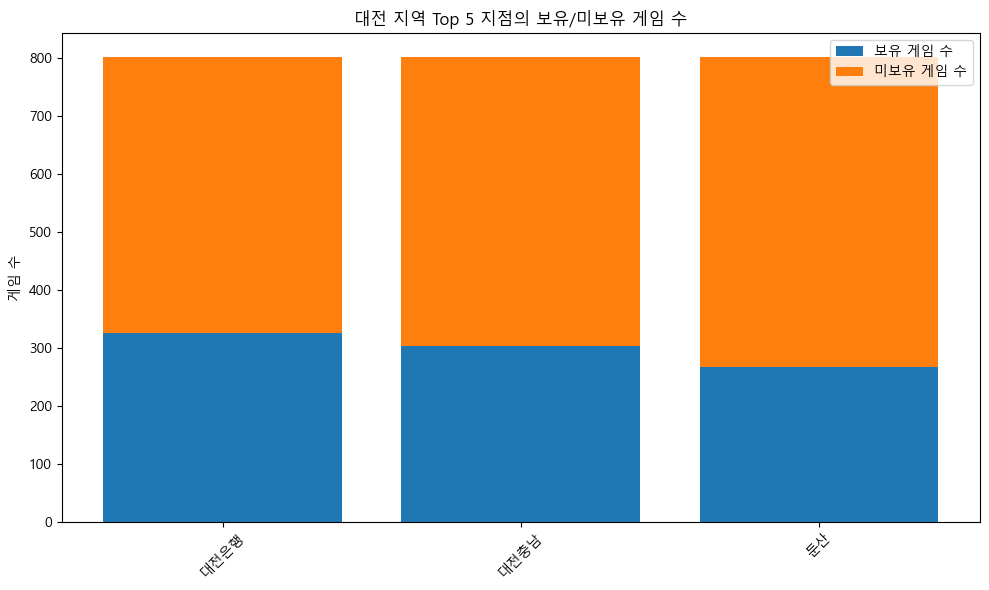

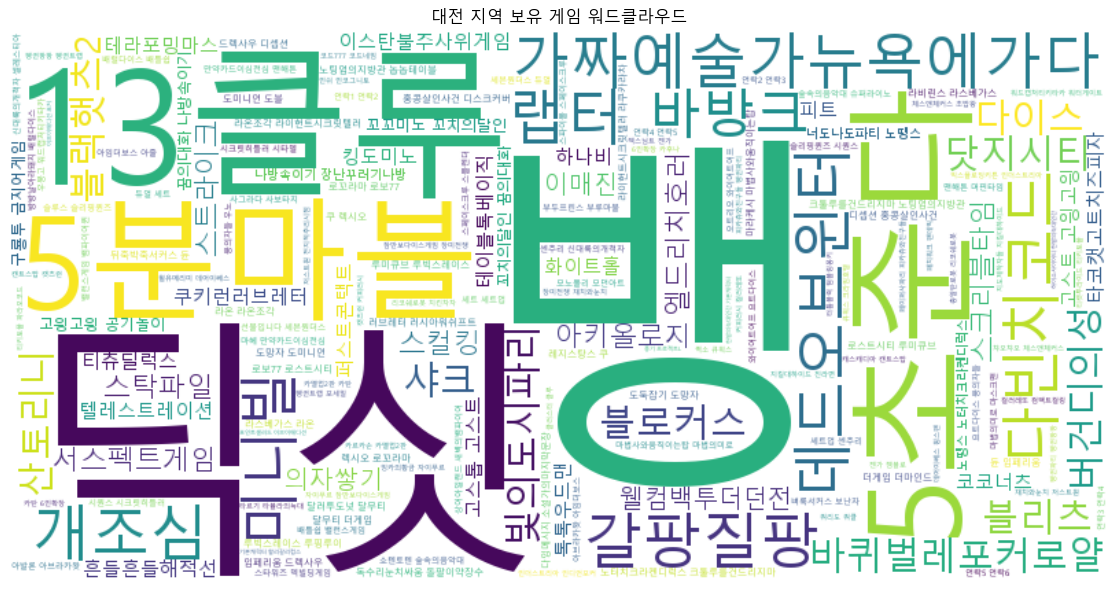

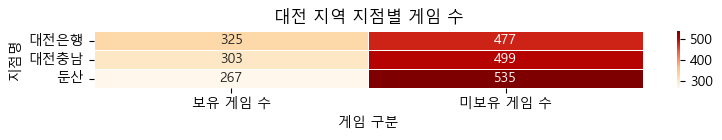

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 데이터 로드
df = pd.read_csv("store_game_summary_normalized.csv", encoding="utf-8-sig")

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 사용자로부터 선택된 지역 (웹 연동 시 query param 또는 form 값으로 전달됨)
selected_region = "대전"  # 예시 지역 (웹에선 동적으로 바뀔 것)

# 지역 필터링
region_df = df[df["지역"] == selected_region].copy()
region_df["지역_지점"] = region_df["지역"] + " - " + region_df["지점명"]

# 1. 보유/미보유 게임 수 막대 그래프 (Top 5 지점)
top5 = region_df.sort_values(by='보유 게임 수', ascending=False).head(5)
fig1, ax1 = plt.subplots(figsize=(10, 6))
x = range(len(top5['지점명']))
ax1.bar(x, top5['보유 게임 수'], label='보유 게임 수')
ax1.bar(x, top5['미보유 게임 수'], bottom=top5['보유 게임 수'], label='미보유 게임 수')
ax1.set_xticks(x)
ax1.set_xticklabels(top5['지점명'], rotation=45)
ax1.set_title(f"{selected_region} 지역 Top 5 지점의 보유/미보유 게임 수")
ax1.set_ylabel("게임 수")
ax1.legend()
fig1.tight_layout()

# 2. 워드클라우드 (보유 게임 목록)
# 한글 폰트 경로 지정 (예: Windows 기준 Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 또는 다른 한글 폰트 경로
region_owned = region_df["보유 게임 목록"].str.cat(sep='; ')
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate(region_owned)

fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis("off")
ax2.set_title(f"{selected_region} 지역 보유 게임 워드클라우드")
fig2.tight_layout()


# 3. 히트맵 (지점별 보유 게임 수)
# 히트맵용 pivot 테이블 생성 (지점명 기준)
pivot = region_df[["지점명", "보유 게임 수", "미보유 게임 수"]].set_index("지점명")

# 히트맵 시각화
fig3, ax3 = plt.subplots(figsize=(8, len(pivot) * 0.5))
sns.heatmap(pivot, cmap="OrRd", linewidths=0.5, annot=True, fmt=".0f", ax=ax3)

# 타이틀 및 레이블 설정
ax3.set_title(f"{selected_region} 지역 지점별 게임 수")
ax3.set_xlabel("게임 구분")
ax3.set_ylabel("지점명")
fig3.tight_layout()

